In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm



In [20]:
# Parameters
S0 = 14.0           # Initial asset price
K = 6.0             # Strike price
r = 0.1             # Risk-free rate
sigma = 0.1         # Volatility
T = 2.0             # Time to maturity (years)
N = 120             # Number of time steps (lattice points)
dt = T / N          # Time step


In [21]:
def bs_action(path, r, sigma, dt):
    mu = 0.5 * sigma**2 - r
    diffs = np.diff(path) / dt
    L = ((diffs - mu)**2) * dt / (2 * sigma**2)
    return np.sum(L)


In [22]:
class MetropolisSampler:
    def __init__(self, X0, N, dt, r, sigma, T, step_size=0.1):
        self.X0 = X0
        self.N = N
        self.dt = dt
        self.r = r
        self.sigma = sigma
        self.T = T
        self.step_size = step_size
        self.accepted_paths = []

    def sample(self, num_paths):
        X = np.linspace(self.X0, self.X0 + (self.r - 0.5 * self.sigma**2) * self.T, self.N + 1)
        S = bs_action(X, self.r, self.sigma, self.dt)

        for _ in range(num_paths):
            X_new = X.copy()
            idx = np.random.randint(1, self.N)
            X_new[idx] += np.random.normal(0, self.step_size)
            S_new = bs_action(X_new, self.r, self.sigma, self.dt)
            dS = S_new - S

            if dS < 0 or np.random.rand() < np.exp(-dS):
                X = X_new
                S = S_new
                self.accepted_paths.append(X.copy())

        return np.array(self.accepted_paths)


In [23]:
def asian_payoff(paths, K, dt):
    averages = np.mean(np.exp(paths[:, 1:]), axis=1)
    return np.maximum(averages - K, 0)


In [24]:
X0 = np.log(S0)
sampler = MetropolisSampler(X0, N, dt, r, sigma,T,step_size=0.05)
accepted = sampler.sample(num_paths=1000)
payoffs = asian_payoff(accepted, K, dt)
price = np.exp(-r * T) * np.mean(payoffs)

print(f"Estimated Asian Option Price: {price:.4f}")


Estimated Asian Option Price: 7.7239


In [25]:
X0 = np.log(S0)
sampler1 = MetropolisSampler(X0, N, dt, r, sigma,T,step_size=0.05)
accepted1 = sampler.sample(num_paths=1000)
payoffs = asian_payoff(accepted1, K, dt)
price = np.exp(-r * T) * np.mean(payoffs)

print(f"Estimated Asian Option Price: {price:.4f}")


Estimated Asian Option Price: 7.7189


In [26]:
final_X = paths[:, -1]
plt.hist(final_X, bins=40, density=True, alpha=0.6, label="Simulated")
mu = X0 + (r - 0.5 * sigma**2) * T
std = sigma * np.sqrt(T)
x_vals = np.linspace(min(final_X), max(final_X), 100)
plt.plot(x_vals, norm.pdf(x_vals, mu, std), label="Theoretical", color="black")
plt.title("Distribution of Final log-Prices")
plt.legend()


TypeError: 'MetropolisSampler' object is not subscriptable

In [27]:
X = np.linspace(X0, X0 + (r - 0.5 * sigma**2) * T, N+1)
X

array([2.63905733, 2.64064066, 2.642224  , 2.64380733, 2.64539066,
       2.646974  , 2.64855733, 2.65014066, 2.651724  , 2.65330733,
       2.65489066, 2.656474  , 2.65805733, 2.65964066, 2.661224  ,
       2.66280733, 2.66439066, 2.665974  , 2.66755733, 2.66914066,
       2.670724  , 2.67230733, 2.67389066, 2.675474  , 2.67705733,
       2.67864066, 2.680224  , 2.68180733, 2.68339066, 2.684974  ,
       2.68655733, 2.68814066, 2.689724  , 2.69130733, 2.69289066,
       2.694474  , 2.69605733, 2.69764066, 2.699224  , 2.70080733,
       2.70239066, 2.703974  , 2.70555733, 2.70714066, 2.708724  ,
       2.71030733, 2.71189066, 2.713474  , 2.71505733, 2.71664066,
       2.718224  , 2.71980733, 2.72139066, 2.722974  , 2.72455733,
       2.72614066, 2.727724  , 2.72930733, 2.73089066, 2.732474  ,
       2.73405733, 2.73564066, 2.737224  , 2.73880733, 2.74039066,
       2.741974  , 2.74355733, 2.74514066, 2.746724  , 2.74830733,
       2.74989066, 2.751474  , 2.75305733, 2.75464066, 2.75622

Text(0, 0.5, 'log(S)')

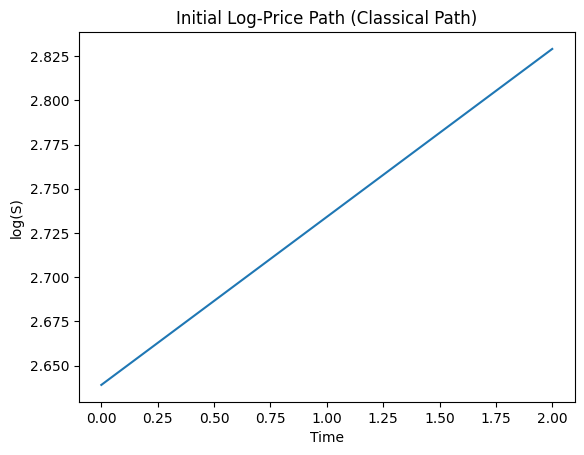

In [28]:
plt.plot(np.linspace(0, T, N+1), X)
plt.title("Initial Log-Price Path (Classical Path)")
plt.xlabel("Time")
plt.ylabel("log(S)")


In [30]:
d=pd.DataFrame(accepted)

In [32]:
d.head()

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
0,2.639057,2.640641,2.642224,2.643807,2.645391,2.646974,2.648557,2.650141,2.651724,2.653307,...,2.814807,2.816391,2.817974,2.819557,2.821141,2.822724,2.824307,2.825891,2.827474,2.829057
1,2.639057,2.640641,2.642224,2.643807,2.645391,2.646974,2.648557,2.650141,2.651724,2.653307,...,2.814807,2.816391,2.817974,2.819557,2.821141,2.822724,2.824307,2.825891,2.827474,2.829057
2,2.639057,2.640641,2.642224,2.643807,2.645391,2.646974,2.648557,2.650141,2.651724,2.653307,...,2.814807,2.816391,2.817974,2.819557,2.821141,2.822724,2.824307,2.825891,2.827474,2.829057
3,2.639057,2.640641,2.642224,2.643807,2.645391,2.646974,2.648557,2.650141,2.651724,2.653307,...,2.814807,2.816391,2.817974,2.819557,2.821141,2.822724,2.824307,2.825891,2.827474,2.829057
4,2.639057,2.640641,2.642224,2.643807,2.645391,2.646974,2.648557,2.650141,2.651724,2.653307,...,2.814807,2.816391,2.817974,2.819557,2.821141,2.822724,2.824307,2.825891,2.827474,2.829057
